<a href="https://colab.research.google.com/github/ashwinamrutphale/algorithms/blob/master/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from google.colab import files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
test = pd.read_csv('/content/gdrive/''My Drive''/aml-homeworks/homework2/test.txt',header=None)
train = pd.read_csv('/content/gdrive/''My Drive''/aml-homeworks/homework2/train.txt',header=None)

In [0]:
def scale_unit(ds):
  d = ds.loc[:,ds.columns!=14].values
  r = ds.loc[:,ds.columns==14]
  l = pd.DataFrame(scale(d,with_mean=True,with_std=True))
  return l.join(r,lsuffix='_l',rsuffix='_r')  

In [0]:
train_scaled = scale_unit(train.drop(columns=[1,3,5,6,7,8,9,13]))
test_scaled = scale_unit(test.drop(columns=[1,3,5,6,7,8,9,13]))


In [0]:
def compute_gradient(a,b,x,y,l,e):
  if ((np.dot(a.T,x) + b)*y).flatten()[0] >= 1:
    new_a = a - e*l*a
    new_b = b
  else:
    new_a = a - e*(l*a - y*x)
    new_b = b - e  * y * -1
  return new_a,new_b

def get_eta(s):
  return 1 /(0.001 * s + 50)

def translate_result(val):
  if ('<=50K' == val.strip()):
    return -1
  else:
    return 1

def test(a,b,x):
  if (np.dot(a.T,x) + b) >= 0:
    return 1
  else:
    return -1

def test_accuracy(t_set,a,b):
  accuracy = 0
  for index,row in t_set.iterrows():
    if test(a,b,((row.values[:-1])[np.newaxis]).T) == translate_result(row.values[6]):
      accuracy += 1
  return (accuracy/len(t_set)*100)                  

def predict(t_set,a,b):
  res = []
  for index,row in t_set.iterrows():
    if test(a,b,((row.values)[np.newaxis]).T) == 1:
      res.append('>50K')
    else:
      res.append('<=50K')
  return pd.DataFrame({'col':res})
    

In [0]:
lmbd = np.array([1e-3, 1e-2, 1e-1, 1])
msk = np.random.rand(len(train_scaled))<0.9
train_subset = train_scaled[msk]
validate_subset = train_scaled[~msk]

a_list_o = np.zeros((4,500))
acc_list_o = np.zeros((4,500))
test_acc_list = np.zeros(4)
lc = 0
for l1 in lmbd:
  a1 = (np.array([0,0,0,0,0,0])[np.newaxis]).T
  b1 = 0
  a_list= np.zeros(500)
  acc_list=np.zeros(500)
  print("starting lambda",l1)
  ct = 0
  for season in range(50):
    e1 = get_eta(season)
    tst = train_subset.sample(50)
    trn = train_subset.drop(tst.index)
    i = 0
    for step in range(300):
      smpl = trn.sample(1)
      y1 = translate_result(smpl.values.flatten()[6])
      x1 = smpl.values.flatten()[:-1][np.newaxis].T
      a_n,b_n = compute_gradient(a1,b1,x1,y1,l1,e1)
      a1 = a_n
      b1 = b_n
      if i == 29:
        a_list[ct] = np.dot(a1.T,a1)
        acc_list[ct] = test_accuracy(tst,a1,b1)
        ct +=1
        i =0
      i +=1
  a_list_o[lc] = a_list
  acc_list_o[lc] = acc_list
  test_acc_list[lc] = test_accuracy(validate_subset,a1,b1)
  lc += 1
print(test_acc_list)  

starting lambda 0.001
starting lambda 0.01
starting lambda 0.1
starting lambda 1.0
[79.16573223 80.10764745 78.91904014 75.75689617]


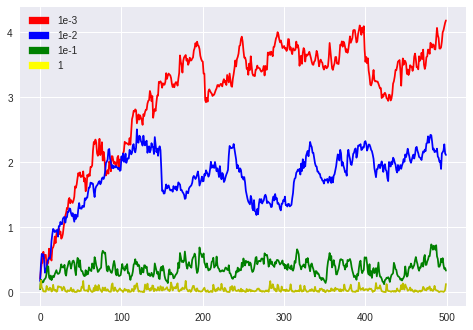

In [0]:
x_coordinate = [i for i in range(len(a_list_o[0])) ]
plt.plot(x_coordinate,a_list_o[0], 
         'r-',x_coordinate,a_list_o[1], 
         'b-',x_coordinate,a_list_o[2],
         'g-',x_coordinate,a_list_o[3],'y-')
red_patch = mpatches.Patch(color='red', label='1e-3')
blue_patch = mpatches.Patch(color='blue', label='1e-2')
green_patch = mpatches.Patch(color='green', label='1e-1')
yellow_patch = mpatches.Patch(color='yellow', label='1')
plt.legend(handles=[red_patch,blue_patch,green_patch,yellow_patch])
plt.show()
      

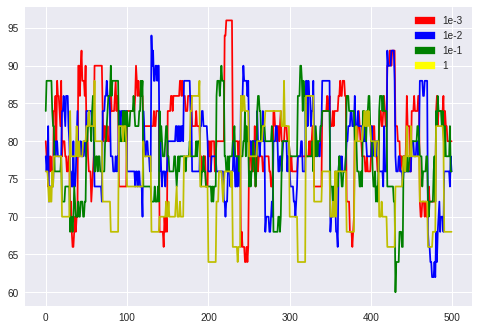

In [0]:
x_acc = [i for i in range(len(acc_list_o[0])) ]
plt.plot(x_acc,acc_list_o[0], 
         'r-',x_coordinate,acc_list_o[1], 
         'b-',x_coordinate,acc_list_o[2],
         'g-',x_coordinate,acc_list_o[3],'y-')
red_patch = mpatches.Patch(color='red', label='1e-3')
blue_patch = mpatches.Patch(color='blue', label='1e-2')
green_patch = mpatches.Patch(color='green', label='1e-1')
yellow_patch = mpatches.Patch(color='yellow', label='1')
plt.legend(handles=[red_patch,blue_patch,green_patch,yellow_patch])
plt.show()

In [0]:
  
  lm = 1e-3
  a_par = (np.array([0,0,0,0,0,0])[np.newaxis]).T
  b_par = 0
  for season in range(50):
    e1_par = get_eta(season)
    for step in range(300):
      smpl_par = train_scaled.sample(1)
      y_p = translate_result(smpl_par.values.flatten()[6])
      x_p = smpl_par.values.flatten()[:-1][np.newaxis].T
      a_n_p,b_n_p = compute_gradient(a_par,b_par,x_p,y_p,lm,e1_par)
      a_par = a_n_p
      b_par = b_n_p
  result = predict(test_scaled,a_par,b_par)
 

In [0]:

result.to_csv('r.csv', index=False)
files.download('r.csv')